##Prediksi Harga barang merah daerah sumenep
### 1. Latar Belakang
Sumenep merupakan salah satu daerah di Jawa Timur yang memiliki sektor pertanian yang cukup penting, terutama dalam produksi bawang merah. Harga bawang merah, seperti banyak komoditas pertanian, cenderung fluktuatif karena berbagai faktor seperti kondisi cuaca, pasokan, permintaan, dan kebijakan pemerintah. Fluktuasi ini berdampak pada pendapatan petani, ketersediaan barang di pasar, serta pada pembeli yang bergantung pada komoditas tersebut untuk kebutuhan sehari-hari atau bisnis.

### 2. Masalah bisnis
Harga bawang yang tidak stabil menyebabkan ketidakpastian baik bagi petani maupun pedagang. Jika harga naik terlalu tinggi, pembeli dapat beralih ke alternatif, sementara jika harga turun drastis, petani mungkin merugi. Oleh karena itu, diperlukan sistem yang dapat memprediksi harga bawang untuk satu periode ke depan agar dapat membantu petani dan pedagang dalam membuat keputusan yang lebih baik, seperti menentukan waktu yang tepat untuk menjual atau menahan stok.

###3. Tujuan bisnis
Tujuan utama dari penelitian ini adalah membangun model prediksi harga bawang merah satu periode ke depan di Sumenep agar:

<p>a. Petani dapat mengambil keputusan yang lebih bijak terkait kapan mereka harus menjual hasil panen mereka untuk memaksimalkan keuntungan.</p>
<p>b. Pedagang dan distributor dapat menentukan kapan harus membeli stok dalam jumlah besar atau kapan harus menahan pembelian.</p>
<p>c.Pembuat kebijakan dapat merumuskan intervensi kebijakan seperti subsidi atau penyimpanan cadangan pangan untuk menstabilkan harga di pasar.</p>





In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
import pickle


In [ ]:
# !pip install gdown


In [ ]:
# import gdown
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membaca file CSV
# data = pd.read_csv('/content/drive/MyDrive/Proyek_sains_data/hargaBawangMerah_2022-2024.csv',thousands=',')
data = pd.read_csv('/content/drive/MyDrive/Proyek_sains_data/hargaBawang2020_2024.csv',thousands=',')


In [ ]:
# jika ingin upload data dari lokal
from google.colab import files
uploaded = files.upload()

Data harga Bawang Merah per minggu di daerah pamekasan

In [ ]:
data

,Tanggal,Harga
0,01/ 01/ 2020,30000
1,08/ 01/ 2020,30000
2,15/ 01/ 2020,29750
3,22/ 01/ 2020,27750
4,29/ 01/ 2020,27000
...,...,...
251,23/ 10/ 2024,30000
252,30/ 10/ 2024,30000
253,06/ 11/ 2024,36250
254,13/ 11/ 2024,38500


In [ ]:
print(data.describe())

              Harga
count    256.000000
mean   31266.601562
std     9183.603397
min    18000.000000
25%    25187.500000
50%    29000.000000
75%    35750.000000
max    72500.000000


In [ ]:
# Mengecek jumlah nilai null di setiap kolom
print(data.isnull().sum())

Tanggal    0
Harga      0
dtype: int64


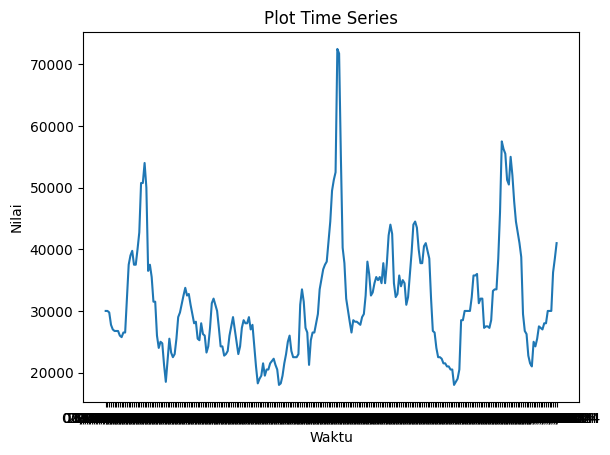

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi data time series
plt.plot(data['Tanggal'], data['Harga'])
plt.title('Plot Time Series')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.show()


In [ ]:
prices = data['Harga'].values
print(prices)

[30000 30000 29750 27750 27000 26750 26750 26750 26000 25750 26500 26500
 32000 37500 39000 39750 37500 37500 40000 42750 50750 50750 54000 50000
 36500 37500 35500 31500 31500 26000 24000 25000 24750 21250 18500 22000
 25500 23250 22500 23000 25500 29000 29750 31125 32500 33750 32500 32750
 31000 29500 28000 28250 25500 25250 28000 26250 26000 23250 24250 27250
 31250 32000 31000 30000 27250 24250 24250 22750 23000 23500 26000 27500
 29000 27000 25000 23000 24250 27250 28500 28000 28000 29000 27000 27750
 24375 21000 18250 19000 19500 21500 19500 20500 20500 21500 21875 22250
 21250 20500 18000 18250 19500 21500 23000 25000 26000 23500 22500 22500
 22500 23000 31000 33500 31500 27250 26500 21250 25250 26500 26500 28000
 29500 33500 35125 36750 37500 38000 41250 44500 49500 51250 52500 72500
 71750 55000 40250 37750 32000 30125 28250 26500 28500 28250 28250 28000
 27750 29000 29500 32500 38000 36000 32500 33000 34500 35500 35000 35500
 34500 37750 34500 37750 42250 44000 42500 34500 32

### Melakukan sliding window

In [ ]:
# melakukan sliding window
def sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 3  # Ukuran jendela =3
X, y = sliding_window(prices, window_size)
print("X:", X)
print("y:", y)

X: [[30000 30000 29750]
 [30000 29750 27750]
 [29750 27750 27000]
 [27750 27000 26750]
 [27000 26750 26750]
 [26750 26750 26750]
 [26750 26750 26000]
 [26750 26000 25750]
 [26000 25750 26500]
 [25750 26500 26500]
 [26500 26500 32000]
 [26500 32000 37500]
 [32000 37500 39000]
 [37500 39000 39750]
 [39000 39750 37500]
 [39750 37500 37500]
 [37500 37500 40000]
 [37500 40000 42750]
 [40000 42750 50750]
 [42750 50750 50750]
 [50750 50750 54000]
 [50750 54000 50000]
 [54000 50000 36500]
 [50000 36500 37500]
 [36500 37500 35500]
 [37500 35500 31500]
 [35500 31500 31500]
 [31500 31500 26000]
 [31500 26000 24000]
 [26000 24000 25000]
 [24000 25000 24750]
 [25000 24750 21250]
 [24750 21250 18500]
 [21250 18500 22000]
 [18500 22000 25500]
 [22000 25500 23250]
 [25500 23250 22500]
 [23250 22500 23000]
 [22500 23000 25500]
 [23000 25500 29000]
 [25500 29000 29750]
 [29000 29750 31125]
 [29750 31125 32500]
 [31125 32500 33750]
 [32500 33750 32500]
 [33750 32500 32750]
 [32500 32750 31000]
 [32750 31

In [ ]:
jumlahData=len(X)
print(jumlahData)

253


In [ ]:
# Normalisasikan data
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# # Menampilkan hasil normalisasi
# print("X setelah normalisasi:", X_scaled)

In [ ]:
X_scaled

array([[0.22018349, 0.22018349, 0.21559633],
       [0.22018349, 0.21559633, 0.17889908],
       [0.21559633, 0.17889908, 0.16513761],
       [0.17889908, 0.16513761, 0.16055046],
       [0.16513761, 0.16055046, 0.16055046],
       [0.16055046, 0.16055046, 0.16055046],
       [0.16055046, 0.16055046, 0.14678899],
       [0.16055046, 0.14678899, 0.14220183],
       [0.14678899, 0.14220183, 0.1559633 ],
       [0.14220183, 0.1559633 , 0.1559633 ],
       [0.1559633 , 0.1559633 , 0.25688073],
       [0.1559633 , 0.25688073, 0.35779817],
       [0.25688073, 0.35779817, 0.3853211 ],
       [0.35779817, 0.3853211 , 0.39908257],
       [0.3853211 , 0.39908257, 0.35779817],
       [0.39908257, 0.35779817, 0.35779817],
       [0.35779817, 0.35779817, 0.40366972],
       [0.35779817, 0.40366972, 0.45412844],
       [0.40366972, 0.45412844, 0.60091743],
       [0.45412844, 0.60091743, 0.60091743],
       [0.60091743, 0.60091743, 0.66055046],
       [0.60091743, 0.66055046, 0.58715596],
       [0.

 ### Membuat model bagging regressor dengan nilai estimator adalah metode knn,decision tree,linear regression, SVR


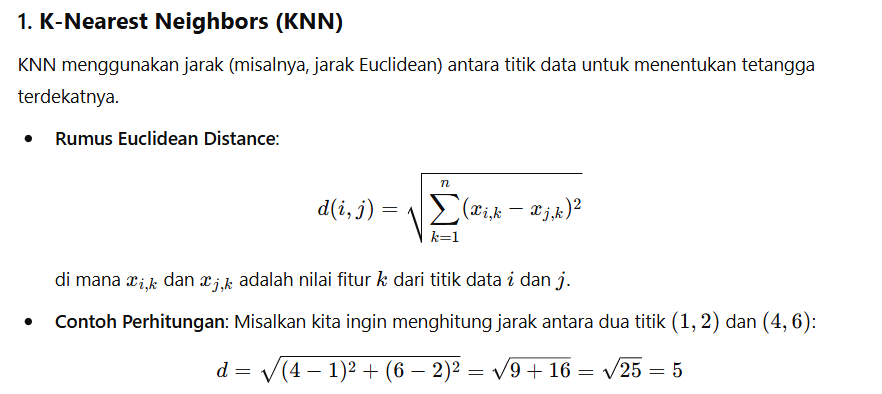

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

[[0.22018349 0.22018349 0.22018349]
 [0.22018349 0.26146789 0.32568807]
 [0.1559633  0.1559633  0.25688073]
 [0.41284404 0.42201835 0.39908257]
 [0.39449541 0.47706422 0.48623853]
 [0.04587156 0.         0.00458716]
 [0.36697248 0.33027523 0.26605505]
 [0.16972477 0.16513761 0.18348624]
 [0.28440367 0.28440367 0.37614679]
 [0.35779817 0.32110092 0.24770642]
 [0.00458716 0.01834862 0.02752294]
 [0.40366972 0.45412844 0.60091743]
 [0.09174312 0.1146789  0.16972477]
 [0.22247706 0.18807339 0.1559633 ]
 [0.05504587 0.04587156 0.04587156]
 [0.48623853 0.46788991 0.40366972]
 [0.21100917 0.16055046 0.15137615]
 [0.44954128 0.30275229 0.26146789]
 [0.28899083 0.26605505 0.2706422 ]
 [0.1146789  0.08715596 0.09174312]
 [0.35779817 0.35779817 0.40366972]
 [0.08715596 0.09174312 0.10091743]
 [0.22018349 0.22018349 0.26146789]
 [0.01834862 0.04587156 0.19266055]
 [0.46788991 0.40366972 0.36238532]
 [0.08256881 0.09174312 0.13761468]
 [0.18348624 0.17889908 0.20183486]
 [0.11697248 0.05504587 0.00

In [ ]:
jumlah=len(X_train)
print(jumlah)
# X_train

227


In [ ]:
# Membuat model KNN
knn = KNeighborsRegressor(n_neighbors=2)

# Membuat model Bagging Regressor
bagging_modeltes = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

# Melatih model pada data yang dihasilkan dari sliding window
bagging_modeltes.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=2), random_state=42)

*Decision* tree adalah algoritma flowchart berbentuk struktur pohon yang digunakan untuk membantu membuat keputusan atau menyelesaikan tugas yang berkaitan dengan regresi dan klasifikasi.
*source* :Geeks for Geeks </br>
Struktur decision tree dimulai dari simpul akar (root node), cabang, simpul internal (internal node/decision node), dan terakhir simpul daun (leaf node/terminal node).

In [ ]:
#membuat model dengan decision tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
bagging_model2 = BaggingRegressor(estimator=tree, n_estimators=10, random_state=42)

# split the dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# Melatih model pada data
bagging_model2.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [ ]:
# mmenggunakan linearRegression
from sklearn.linear_model import LinearRegression

linear= LinearRegression()
bagging_model3 = BaggingRegressor(estimator=linear, n_estimators=10, random_state=42)

# Melatih model pada data
bagging_model3.fit(X_train, y_train)

BaggingRegressor(estimator=LinearRegression(), random_state=42)

Mengambil Model

In [ ]:
with open('bagging_model2.pkl', 'wb') as file:
    pickle.dump(bagging_model2, file)
print("Model berhasil disimpan sebagai 'bagging_model2.pkl'.")


Model berhasil disimpan sebagai 'bagging_model2.pkl'.


### Nilai RMSE
### Nilai RMSE
RMSE mengukur seberapa dekat hasil prediksi model dengan nilai sebenarnya. Rumus RMSE adalah :<br>
RMSE mengukur seberapa besar rata-rata kesalahan antara prediksi dan nilai aktual dalam satuan yang sama dengan data aslinya. RMSE lebih sensitif terhadap kesalahan besar karena setiap selisih antara nilai aktual dan prediksi dikuadratkan
<center>$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}'$</center>

dan nilai mape (Mean Absolute Percentage Error) </br>
MAPE mengukur kesalahan rata-rata dalam bentuk persentase. MAPE sangat berguna ketika ingin mengetahui persentase kesalahan prediksi rata-rata, tetapi sensitif terhadap nilai aktual kecil karena menyebabkan kesalahan besar jika nilai prediksi mendekati nol. <br>
<center>$MAPE = \frac{1}{n}\sum_{i=1}^n(\frac{|y_i -\hat{y}_i|}{y_i})\cdot100$</center>


#### nilai rmse menggunakan knn

In [ ]:
# Prediksi pada data training untuk menghitung RMSE
y_pred = bagging_modeltes.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Menghitung MAPE
mape1 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape1)

RMSE: 3618.0067657110276
MAPE: 8.853047367533696


####Nilai rmse menggunakan decision tree

In [ ]:
y_pred2 = bagging_model2.predict(X_test)

# Prediksi pada data training untuk menghitung RMSE
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("RMSE:", rmse2)

# Menghitung MAPE
mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
print("MAPE:", mape2)


RMSE: 3257.601874921212
MAPE: 7.8899495408261595


#### Nilai rmse menggunakan linear regression

In [ ]:
y_pred3 = bagging_model3.predict(X_test)

# Prediksi pada data training untuk menghitung RMSE
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print("RMSE:", rmse3)

# Menghitung MAPE
mape3= np.mean(np.abs((y_test - y_pred3) / y_test)) * 100
print("MAPE:", mape3)


RMSE: 2809.413302842659
MAPE: 6.750372165692657


### predikns harga minggu ke-2 dengan masing masing metode

In [ ]:
# Data input untuk prediksi (minggu ke-39 sampai ke-41)
new_data = np.array([prices[-3:]])  # Mengambil 3 minggu terakhir

# Prediksi harga pada minggu ke-41
predicted_price1 = bagging_model.predict(new_data)
print("Prediksi harga pada minggu ke-41 menggunakan knn:", predicted_price1)

# predicted_price1_rounded = round(predicted_price1[0], -3)
# print("Prediksi harga pada minggu ke-41 menggunakan knn (dibulatkan):", predicted_price1_rounded)


Prediksi harga pada minggu ke-41 menggunakan knn: [40075.]


In [ ]:
# Data input untuk prediksi (minggu ke-39 sampai ke-41)
new_data = np.array([prices[-3:]])  # Mengambil 3 minggu terakhir

# Prediksi harga pada minggu ke-41
predicted_price2 = bagging_model2.predict(new_data)
print("Prediksi harga pada minggu ke-41 menggunakan decisontree:", predicted_price2)

Prediksi harga pada minggu ke-41 menggunakan decisontree: [39000.]


In [ ]:
# Data input untuk prediksi (minggu ke-39 sampai ke-41)
new_data = np.array([prices[-3:]])  # Mengambil 3 minggu terakhir

# Prediksi harga pada minggu ke-41
predicted_price3 = bagging_model3.predict(new_data)
print("Prediksi harga pada minggu ke-41 menggunakan linear regression :", predicted_price3)

Prediksi harga pada minggu ke-41 menggunakan linear regression : [40934.54714966]


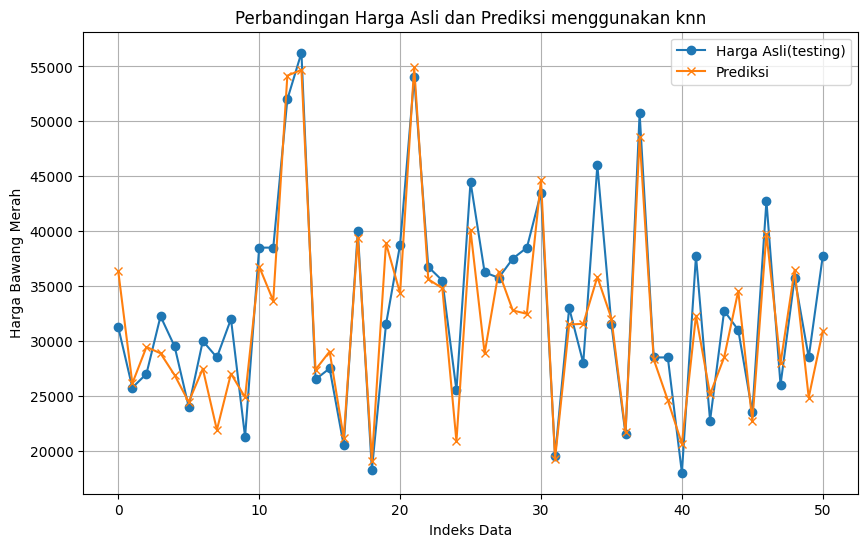

In [ ]:
# 6. Visualisasi Hasil (Opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Harga Asli(testing)', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Prediksi', marker='x')
plt.xlabel('Indeks Data')
plt.ylabel('Harga Bawang Merah')
plt.title('Perbandingan Harga Asli dan Prediksi menggunakan knn')
plt.legend()
plt.grid(True)
plt.show()

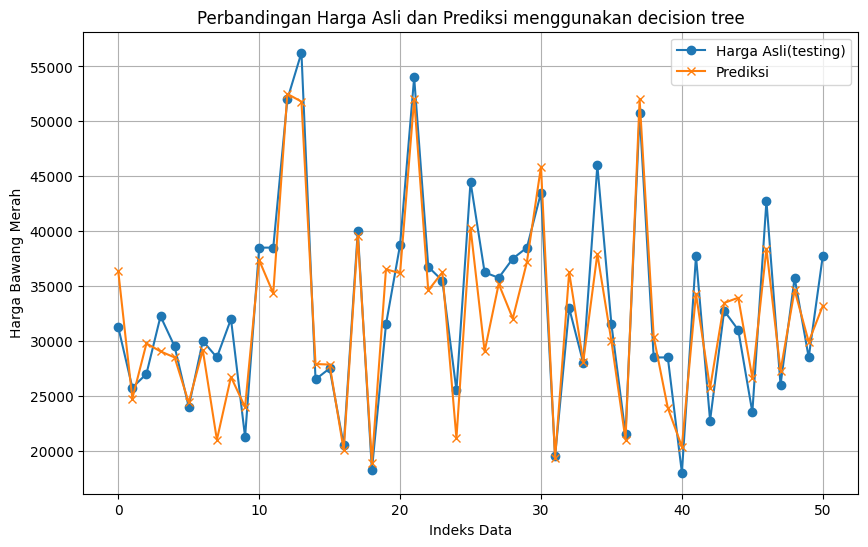

In [ ]:
# 6. Visualisasi Hasil (Opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Harga Asli(testing)', marker='o')
plt.plot(range(len(y_pred2)), y_pred2, label='Prediksi', marker='x')
plt.xlabel('Indeks Data')
plt.ylabel('Harga Bawang Merah')
plt.title('Perbandingan Harga Asli dan Prediksi menggunakan decision tree')
plt.legend()
plt.grid(True)
plt.show()

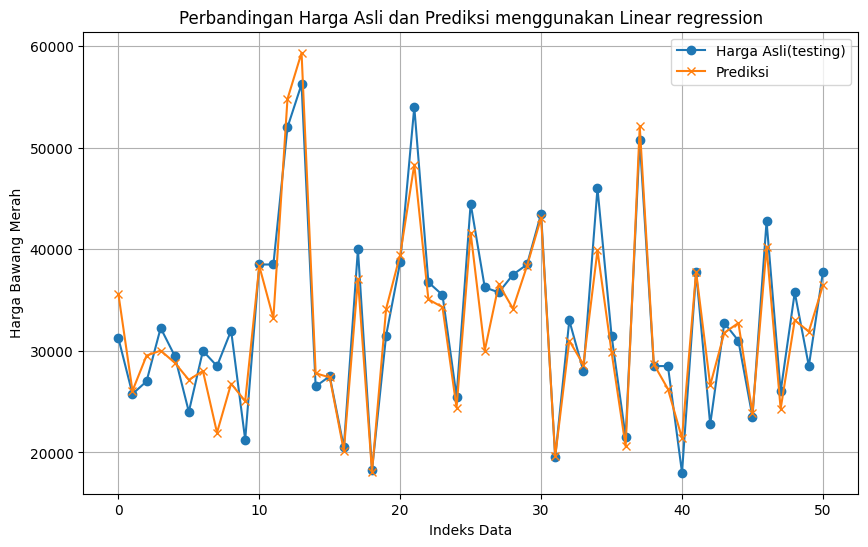

In [ ]:
# 6. Visualisasi Hasil (Opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Harga Asli(testing)', marker='o')
plt.plot(range(len(y_pred3)), y_pred3, label='Prediksi', marker='x')
plt.xlabel('Indeks Data')
plt.ylabel('Harga Bawang Merah')
plt.title('Perbandingan Harga Asli dan Prediksi menggunakan Linear regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from sklearn.svm import SVR

# svr = SVR(kernel='linear')
# bagging_model4 = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

# # Melatih model pada data
# bagging_model4.fit(X, y)

In [ ]:
# y_pred4 = bagging_model4.predict(X)

# # Prediksi pada data training untuk menghitung RMSE
# rmse4 = np.sqrt(mean_squared_error(y, y_pred4))
# print("RMSE:", rmse4)

# # Menghitung MAPE
# mape4= np.mean(np.abs((y - y_pred4) / y)) * 100
# print("MAPE:", mape4)


In [ ]:
# Menghitung RMSE
# data_prediksi= np.array([prices[0], prices[1], prices[2]]).reshape(1, -1) #Reshape new_data to 2D array  # Mengambil 3 minggu terakhir
# predicted1= bagging_model1.predict(new_data)

# rmse = np.sqrt(mean_squared_error([actual_price], predicted1))
# print("RMSE menggunakan metode :", rmse)